In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from numpy import cov
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
import pydot

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)


In [62]:
blocks = [1030, 2030, 3030]
#blocks = [1030, 2030, 3030, 4030, 5030, 6030, 7030]

dfss = []
for block in blocks:
    print(block)
    dfss.append(pd.read_csv('combined_df_'+str(block)+'.csv'))

df = pd.concat(dfss)
df.shape

1030
2030
3030


(1685106, 71)

In [63]:
columns = df.columns
columns

Index(['Unnamed: 0', 'Leading angle', 'Side tilt angle',
       'Surface Contact point X', 'Surface contact point Y',
       'Surface contact point z', 'Surface Orietation X',
       'Surface Orietation Y', 'Surface Orietation Z', 'Tool Tip Point X',
       'Tool Tip Point Y', 'Tool Tip Point Z', 'Tool Orientation X',
       'Tool Orientation Y', 'Tool Orientation Z',
       'Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0)',
       'time', 'MachineX', 'MachineY', 'MachineZ', 'MachineA', 'MachineC',
       'LoadSpindle', 'TransfX', 'TransfY', 'TransfZ', 'TransfI', 'TransfJ',
       'TransfK', 'executionDuration', 'previousExecutionDuration',
       'relativeTimetoPreviousCall program number', 'timeStamp', 'Tool Length',
       'Tool Radius', 'G54-X', 'G54-Y', 'G54-Z', 'G54-A', 'G54-C',
       'ProgNumber', 'Blade', 'Fx_mean', 'Fy_mean', 'Fz_mean', 'Mz_mean',
       'Fc_mean', 'Fa_mean', 'FcN_mean', 'Fres_mean', 'Fx_sigma', 'Fy_sigma',
       'Fz_sigma', 'Mz_sigm

In [64]:
del_col = ['Unnamed: 0']
for column in columns:
    if(df[column].isnull().values.any()==True):
        print(column,df[column].isnull().values.any())
        del_col.append(column)

Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0) True
Closest Point Distance (Tool Tip Point Planning - Tool Tip Point Acquired Blade 0) True


In [65]:
df = df.drop(columns =del_col)
df.shape

(1685106, 68)

In [66]:
columns = df.columns
df.describe()

Leading angle  Side tilt angle  Surface Contact point X  \
count   1.685106e+06     1.685106e+06             1.685106e+06   
mean   -5.405271e-02     1.412285e+00            -4.704189e+00   
std     9.490437e-01     1.911781e-01             1.693196e+01   
min    -1.967589e+00     0.000000e+00            -2.935467e+01   
25%    -9.670210e-01     1.396517e+00            -2.040551e+01   
50%     1.570100e-02     1.501793e+00            -5.617261e+00   
75%     6.471000e-01     1.525919e+00             1.096769e+01   
max     1.784306e+00     1.593057e+00             2.558036e+01   

       Surface contact point Y  Surface contact point z  Surface Orietation X  \
count             1.685106e+06             1.685106e+06          1.685106e+06   
mean              2.068520e+02             2.503679e+01         -2.406759e-02   
std               1.072234e+01             1.045059e+01          5.611080e-01   
min               0.000000e+00             0.000000e+00         -9.999750e-01   
25%               1.984314e+02             1.589527e+01         -5.367980e-01   
50%               2.071120e+02             2.528843e+01         -1.151780e-01   
75%               2.159304e+02             3.488564e+01          5.147860e-01   
max               2.209999e+02             4.174595e+01          9.998340e-01   

       Surface Orietation Y  Surface Orietation Z  Tool Tip Point X  \
count          1.685106e+06          1.685106e+06      1.685106e+06   
mean           5.849370e-02         -1.245639e-02     -5.531573e+00   
std            2.257938e-01          7.934128e-01      1.750080e+01   
min           -6.109120e-01         -9.912930e-01     -3.438620e+01   
25%           -4.650300e-02         -8.422110e-01     -2.099783e+01   
50%            3.576000e-03         -8.143400e-02     -5.957912e+00   
75%            1.196870e-01          8.319280e-01      9.475296e+00   
max            8.168190e-01          9.999650e-01      3.035678e+01   

       Tool Tip Point Y  Tool Tip Point Z  Tool Orientation X  \
count      1.685106e+06      1.685106e+06        1.685106e+06   
mean       2.015284e+02      2.457163e+01        1.150165e-01   
std        1.016330e+01      1.198823e+01        2.068881e-01   
min        1.822412e+02      4.157070e-01       -2.034090e-01   
25%        1.926317e+02      1.470889e+01       -4.804100e-02   
50%        2.014664e+02      2.483764e+01        4.902300e-02   
75%        2.104417e+02      3.446725e+01        2.881760e-01   
max        3.000000e+02      1.000000e+02        5.622900e-01   

       Tool Orientation Y  Tool Orientation Z          time      MachineX  \
count        1.685106e+06        1.685106e+06  1.685106e+06  1.685106e+06   
mean         9.642317e-01        6.947572e-02  1.471199e+02 -7.675739e+01   
std          5.033919e-02        8.285410e-02  8.147841e+01  2.775730e+01   
min          7.912070e-01       -1.191540e-01  6.130467e+00 -1.590177e+02   
25%          9.461180e-01        1.890000e-03  7.990500e+01 -1.007152e+02   
50%          9.907590e-01        4.743000e-02  1.444875e+02 -7.984910e+01   
75%          9.978550e-01        1.316400e-01  2.075225e+02 -5.964490e+01   
max          1.000000e+00        3.204880e-01  4.260464e+02  3.929000e-01   

           MachineY      MachineZ      MachineA      MachineC   LoadSpindle  \
count  1.685106e+06  1.685106e+06  1.685106e+06  1.685106e+06  1.685106e+06   
mean  -7.437794e+01 -1.691036e+02 -7.841017e+01  1.813036e+02  9.821319e+00   
std    1.440398e+01  7.401413e+00  3.214834e+00  1.039171e+02  2.194193e-01   
min   -1.447661e+02 -1.859382e+02 -8.889780e+01  6.000000e-04  3.030017e+00   
25%   -8.515450e+01 -1.738247e+02 -8.081250e+01  9.192410e+01  9.709091e+00   
50%   -7.535110e+01 -1.703608e+02 -7.839340e+01  1.816764e+02  9.815909e+00   
75%   -6.271690e+01 -1.639569e+02 -7.591760e+01  2.715357e+02  9.918182e+00   
max   -4.334280e+01 -6.779710e+01 -7.136510e+01  3.599999e+02  1.961134e+01   

            TransfX       TransfY       TransfZ   

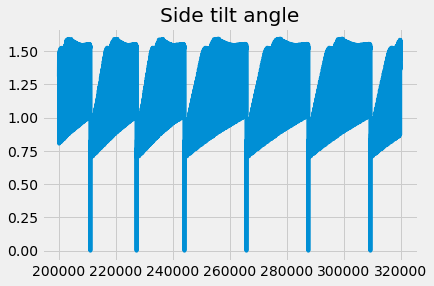

<Figure size 432x288 with 0 Axes>

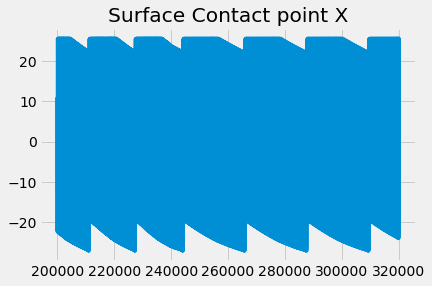

<Figure size 432x288 with 0 Axes>

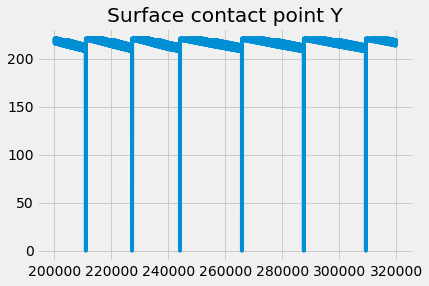

<Figure size 432x288 with 0 Axes>

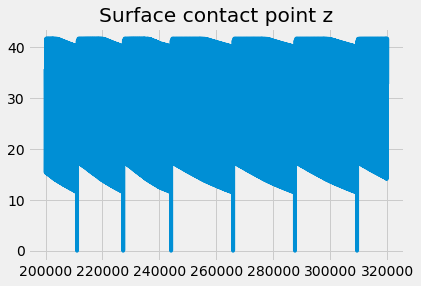

<Figure size 432x288 with 0 Axes>

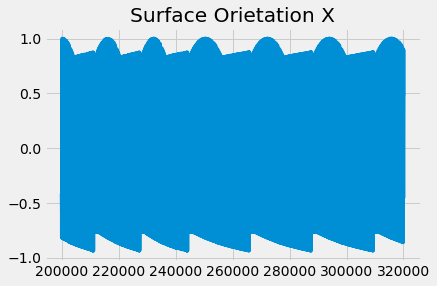

<Figure size 432x288 with 0 Axes>

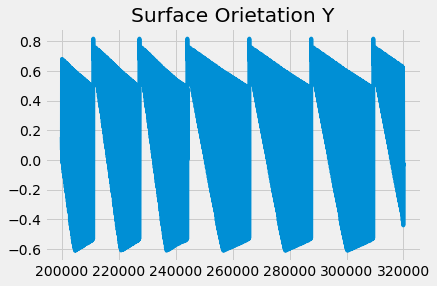

<Figure size 432x288 with 0 Axes>

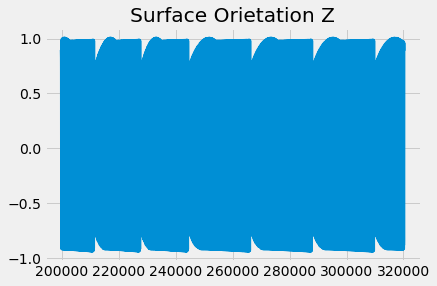

<Figure size 432x288 with 0 Axes>

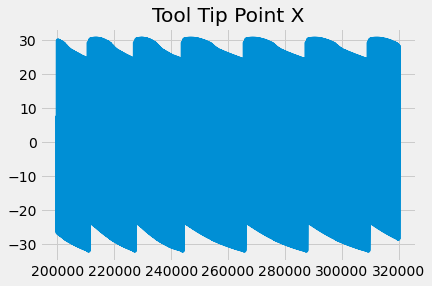

<Figure size 432x288 with 0 Axes>

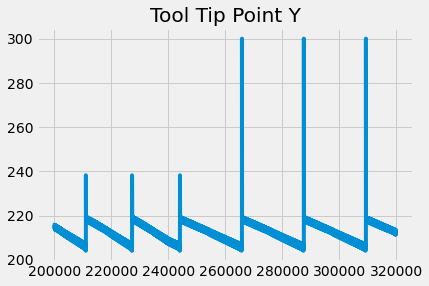

<Figure size 432x288 with 0 Axes>

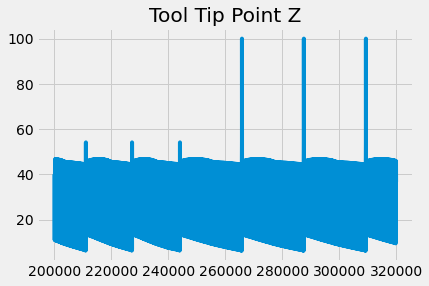

<Figure size 432x288 with 0 Axes>

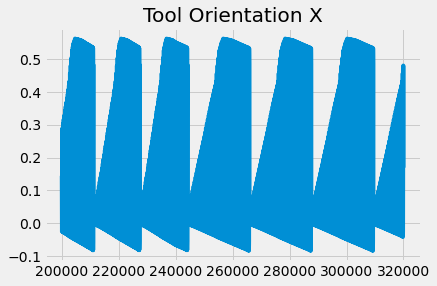

<Figure size 432x288 with 0 Axes>

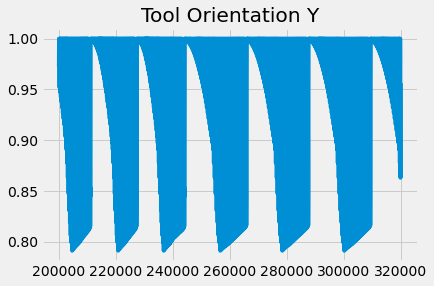

<Figure size 432x288 with 0 Axes>

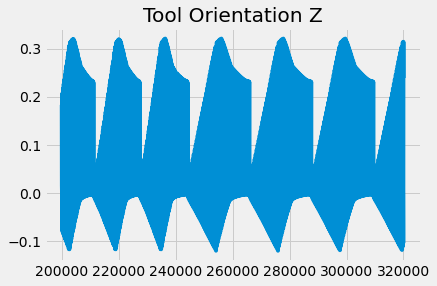

<Figure size 432x288 with 0 Axes>

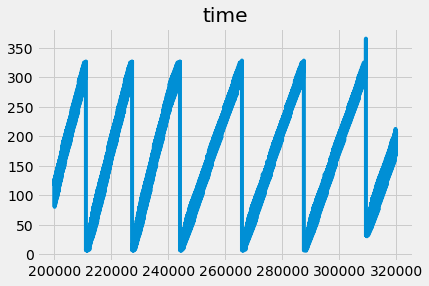

<Figure size 432x288 with 0 Axes>

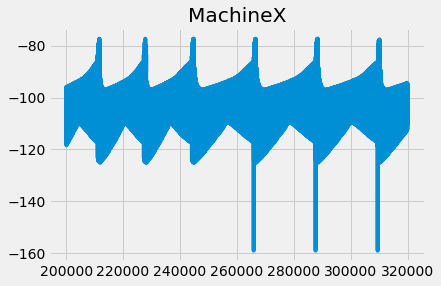

<Figure size 432x288 with 0 Axes>

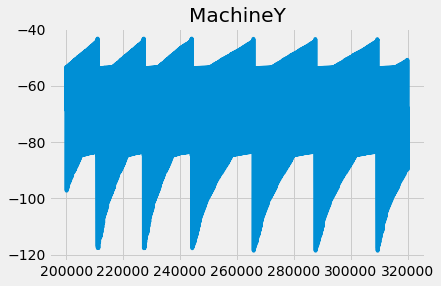

<Figure size 432x288 with 0 Axes>

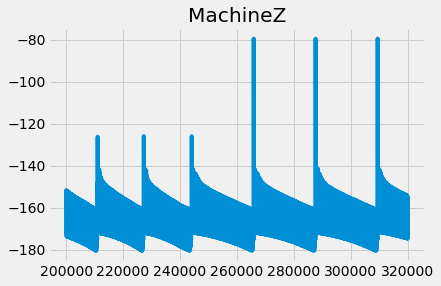

<Figure size 432x288 with 0 Axes>

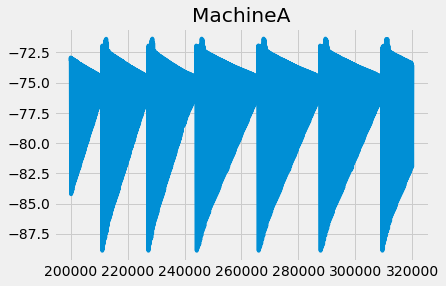

<Figure size 432x288 with 0 Axes>

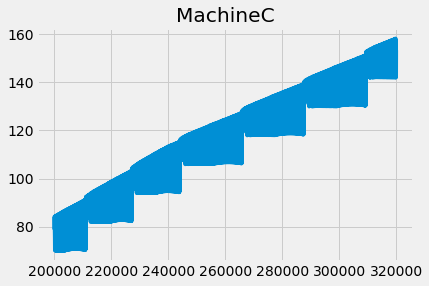

<Figure size 432x288 with 0 Axes>

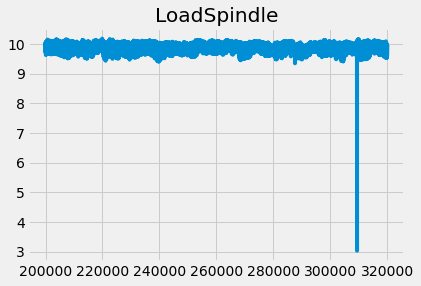

<Figure size 432x288 with 0 Axes>

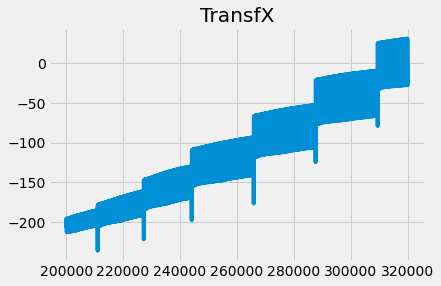

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

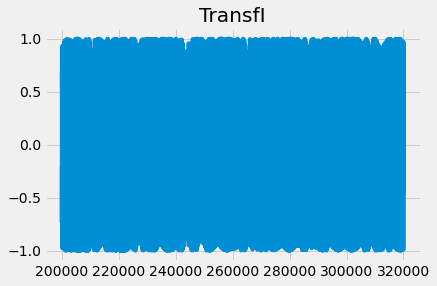

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

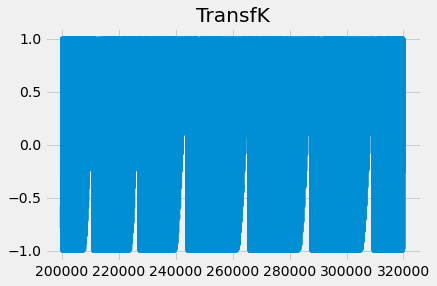

<Figure size 432x288 with 0 Axes>

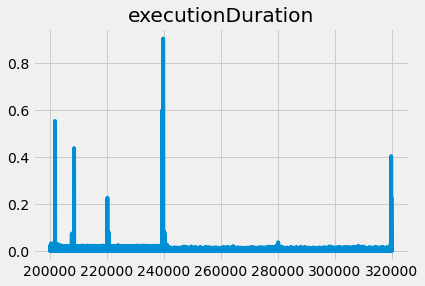

<Figure size 432x288 with 0 Axes>

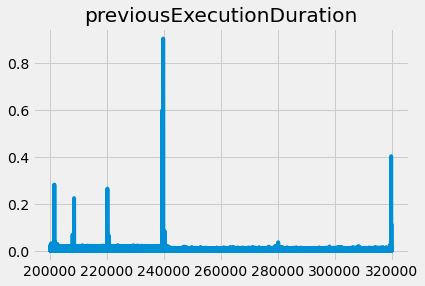

<Figure size 432x288 with 0 Axes>

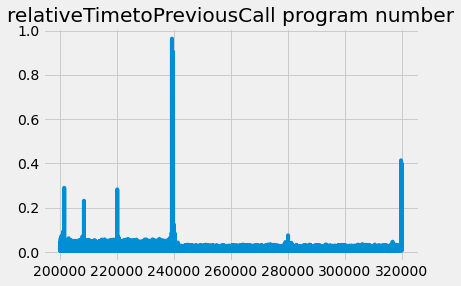

<Figure size 432x288 with 0 Axes>

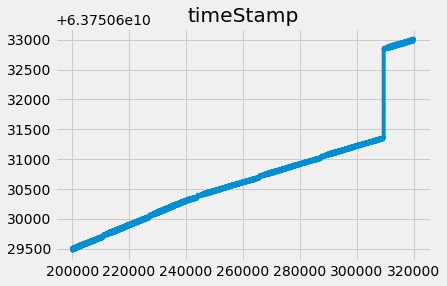

<Figure size 432x288 with 0 Axes>

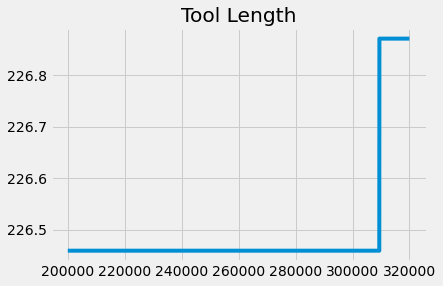

<Figure size 432x288 with 0 Axes>

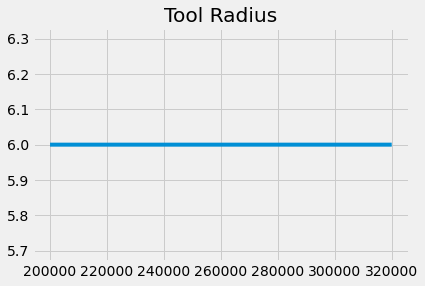

<Figure size 432x288 with 0 Axes>

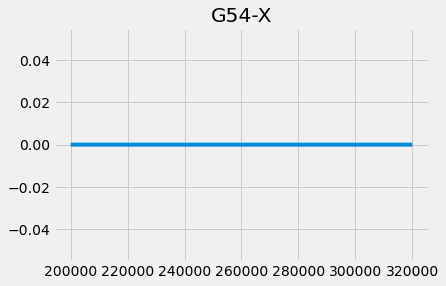

<Figure size 432x288 with 0 Axes>

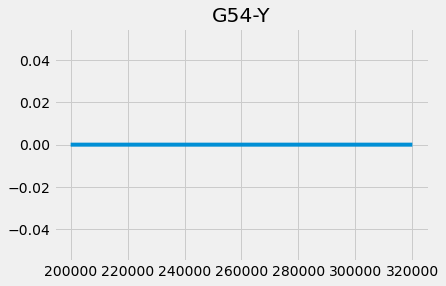

<Figure size 432x288 with 0 Axes>

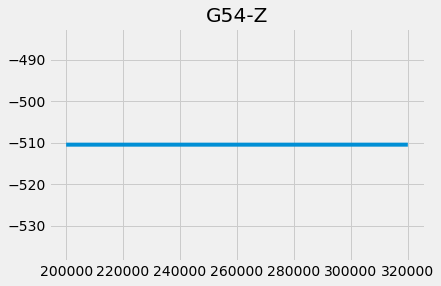

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

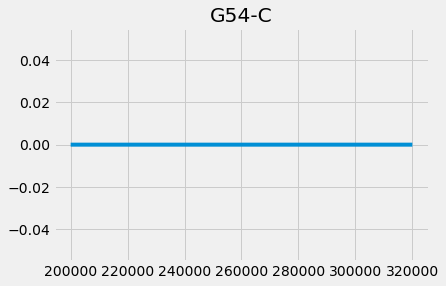

<Figure size 432x288 with 0 Axes>

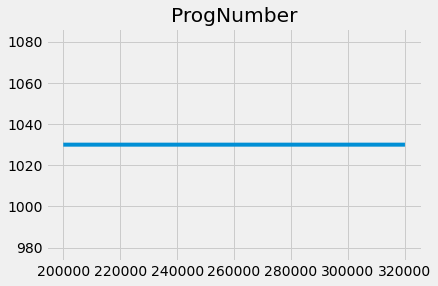

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

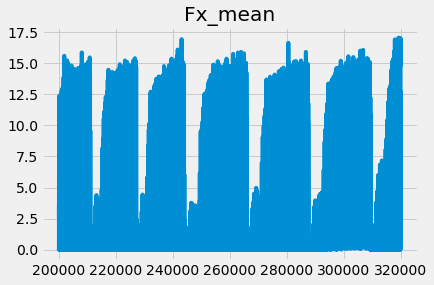

<Figure size 432x288 with 0 Axes>

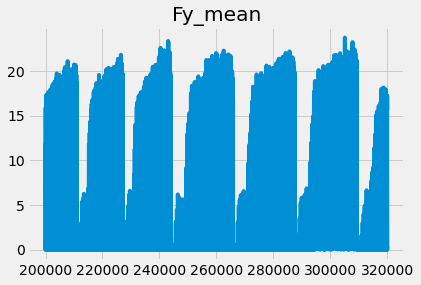

<Figure size 432x288 with 0 Axes>

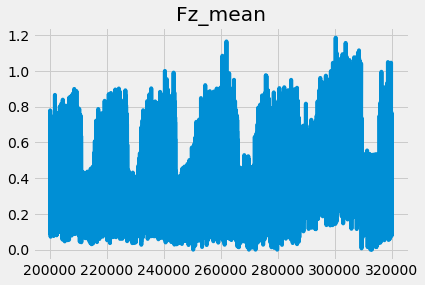

<Figure size 432x288 with 0 Axes>

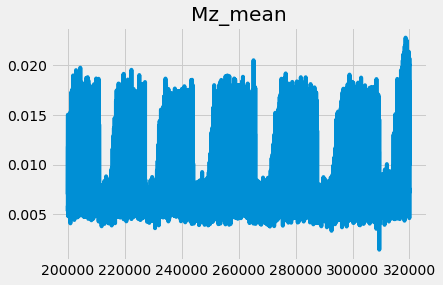

<Figure size 432x288 with 0 Axes>

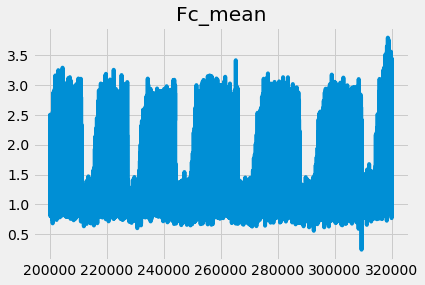

<Figure size 432x288 with 0 Axes>

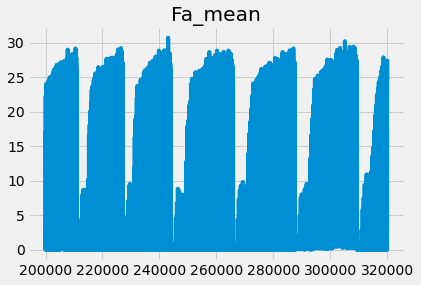

<Figure size 432x288 with 0 Axes>

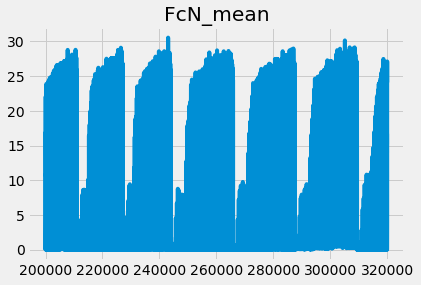

<Figure size 432x288 with 0 Axes>

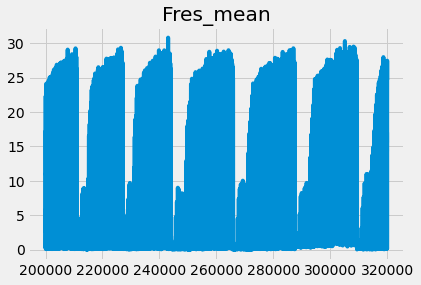

<Figure size 432x288 with 0 Axes>

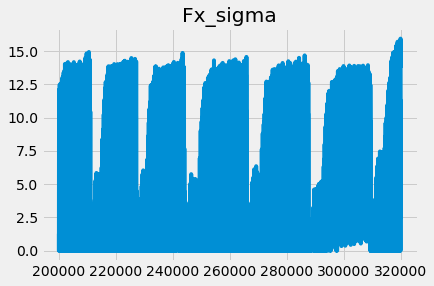

<Figure size 432x288 with 0 Axes>

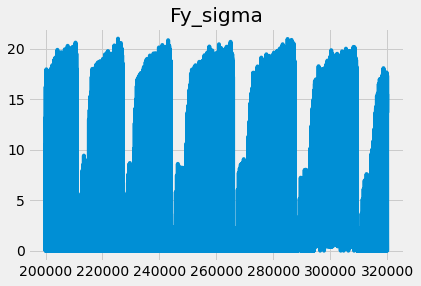

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

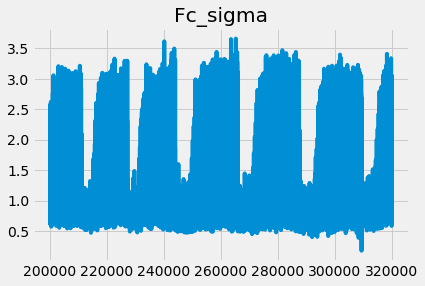

<Figure size 432x288 with 0 Axes>

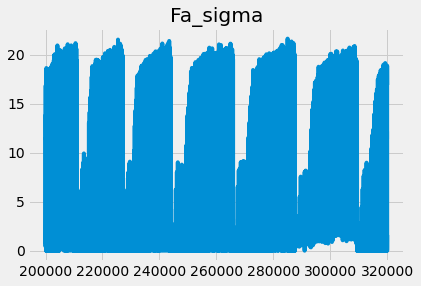

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

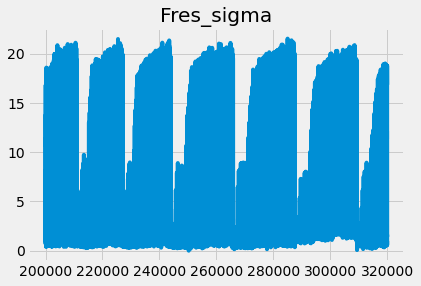

<Figure size 432x288 with 0 Axes>

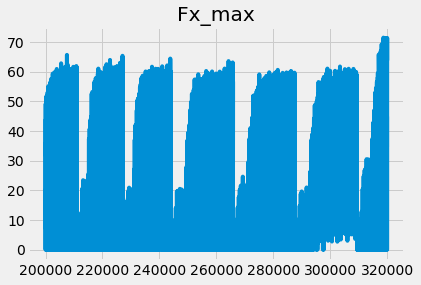

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

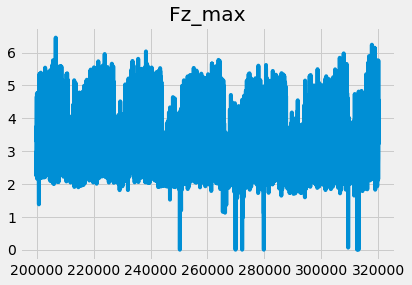

<Figure size 432x288 with 0 Axes>

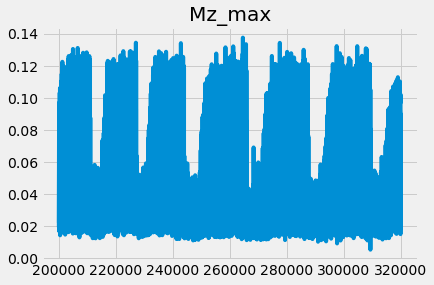

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

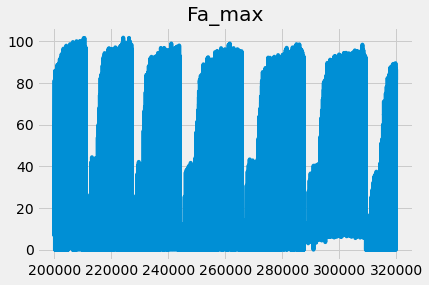

<Figure size 432x288 with 0 Axes>

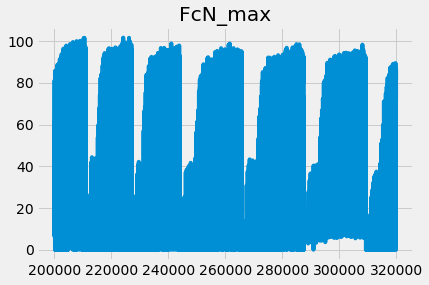

<Figure size 432x288 with 0 Axes>

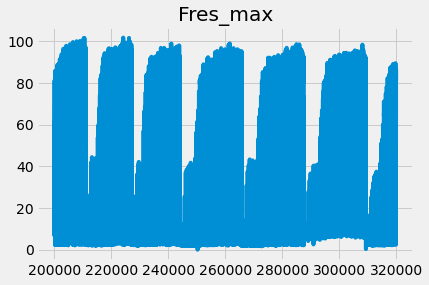

<Figure size 432x288 with 0 Axes>

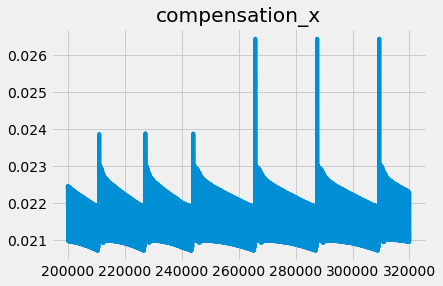

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

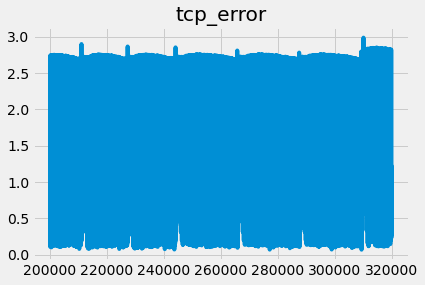

<Figure size 432x288 with 0 Axes>

In [67]:
plot_range = np.arange(200000,320000)
columns = df.columns
index = 0
for column_name in columns:
    index = index+1
    plt.title(column_name)
    plt.plot(df[column_name].iloc[plot_range])
    plt.figure(index)
    plt.pause(0.3)

In [68]:
co_variance = cov(df, rowvar=False)
df_cov = pd.DataFrame(co_variance, columns=df.columns)
df_cov.set_index(columns)


Leading angle  Side tilt angle  \
Leading angle                               9.006840e-01    -1.135352e-02   
Side tilt angle                            -1.135352e-02     3.654906e-02   
Surface Contact point X                     7.183442e-01     3.377690e-01   
Surface contact point Y                    -2.227559e-01    -5.989478e-01   
Surface contact point z                    -1.906294e-01     2.348679e-01   
Surface Orietation X                        3.696523e-01     9.782814e-03   
Surface Orietation Y                        5.034494e-03    -3.641709e-02   
Surface Orietation Z                       -6.403953e-01     2.387204e-02   
Tool Tip Point X                            2.748805e+00     3.348913e-01   
Tool Tip Point Y                           -1.734794e-01    -9.585018e-01   
Tool Tip Point Z                           -3.880449e+00     3.083376e-01   
Tool Orientation X                          3.135693e-02     8.674917e-03   
Tool Orientation Y                         -2.177627e-03    -2.563157e-03   
Tool Orientation Z                         -2.540645e-02     5.527245e-03   
time                                       -8.388245e-01     3.962801e+00   
MachineX                                   -3.060830e+00     2.011084e+00   
MachineY                                   -5.729922e-01    -5.733723e-01   
MachineZ                                   -3.742770e+00    -2.618693e-01   
MachineA                                   -1.148734e+00    -5.436538e-02   
MachineC                                    5.925864e-02    -1.428344e-01   
LoadSpindle                                 2.808084e-04    -4.253420e-03   
TransfX                                    -2.866360e-01    -3.455848e-01   
TransfY                                     1.339705e-02    -7.970171e-03   
TransfZ                                    -3.941480e+00     3.298934e-01   
TransfI                                    -1.501033e-03     1.473440e-04   
TransfJ                                    -4.343168e-03    -4.430247e-04   
TransfK                                    -1.201476e-01    -2.761346e-03   
executionDuration                          -4.345674e-06    -2.784762e-05   
previousExecutionDuration                  -4.211138e-06    -2.672570e-05   
relativeTimetoPreviousCall program number  -1.319045e-05    -3.313105e-05   
timeStamp                                   1.008660e+03     2.803568e+03   
Tool Length                                -3.370995e-03    -7.324727e-03   
Tool Radius                                 0.000000e+00     0.000000e+00   
G54-X                                       0.000000e+00     0.000000e+00   
G54-Y                                       0.000000e+00     0.000000e+00   
G54-Z                                      -7.828849e-18     3.145118e-17   
G54-A                                      -1.845650e-01    -3.018706e-01   
G54-C                                       0.000000e+00     0.000000e+00   
ProgNumber                                  2.249348e+01     6.773414e+01   
Blade                                       1.519349e-01     1.925997e-01   
Fx_mean                                    -8.797501e-01     4.343211e-01   
Fy_mean                                    -8.232394e-01     5.031322e-01   
Fz_mean                                    -2.910297e-02     1.048291e-02   
Mz_mean                                    -6.330181e-04     3.930703e-04   
Fc_mean                                    -1.055030e-01     6.551171e-02   
Fa_mean                                    -1.365531e+00     7.837354e-01   
FcN_mean                                   -1.342842e+00     7.741284e-01   
Fres_mean                                  -1.364238e+00     7.794908e-01   
Fx_sigma                                   -7.876098e-01     5.164240e-01   
Fy_sigma                                   -8.159059e-01     6.089250e-01   
Fz_sigma                                   -3.274279e-02     1.346030e-02   
Mz_sigma                               

In [69]:
corr = np.empty((len(columns),len(columns)))

for i, column1 in enumerate(columns):
    for j,column2 in enumerate(columns):
        corr[i,j] = pearsonr(df[column1],df[column2])[0]

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [70]:
df_corr = pd.DataFrame(corr, columns=df.columns)
df_corr.set_index(columns)

Leading angle  Side tilt angle  \
Leading angle                                   1.000000        -0.062576   
Side tilt angle                                -0.062576         1.000000   
Surface Contact point X                         0.044703         0.104346   
Surface contact point Y                        -0.021890        -0.292187   
Surface contact point z                        -0.019220         0.117556   
Surface Orietation X                            0.694162         0.091197   
Surface Orietation Y                            0.023494        -0.843636   
Surface Orietation Z                           -0.850477         0.157381   
Tool Tip Point X                                0.165501         0.100094   
Tool Tip Point Y                               -0.017986        -0.493310   
Tool Tip Point Z                               -0.341068         0.134534   
Tool Orientation X                              0.159703         0.219327   
Tool Orientation Y                             -0.045582        -0.266337   
Tool Orientation Z                             -0.323105         0.348945   
time                                           -0.010848         0.254403   
MachineX                                       -0.116192         0.378979   
MachineY                                       -0.041916        -0.208217   
MachineZ                                       -0.532834        -0.185068   
MachineA                                       -0.376509        -0.088456   
MachineC                                        0.000601        -0.007190   
LoadSpindle                                     0.001348        -0.101397   
TransfX                                        -0.002109        -0.012622   
TransfY                                         0.000098        -0.000290   
TransfZ                                        -0.341024         0.141693   
TransfI                                        -0.003191         0.001555   
TransfJ                                        -0.009238        -0.004678   
TransfK                                        -0.177767        -0.020282   
executionDuration                              -0.001585        -0.050408   
previousExecutionDuration                      -0.001545        -0.048686   
relativeTimetoPreviousCall program number      -0.003074        -0.038326   
timeStamp                                       0.027611         0.380979   
Tool Length                                    -0.016750        -0.180672   
Tool Radius                                          NaN              NaN   
G54-X                                                NaN              NaN   
G54-Y                                                NaN              NaN   
G54-Z                                          -0.000003         0.000064   
G54-A                                          -0.001865        -0.015146   
G54-C                                                NaN              NaN   
ProgNumber                                      0.028051         0.419322   
Blade                                           0.001538         0.009680   
Fx_mean                                        -0.225953         0.553754   
Fy_mean                                        -0.174303         0.528822   
Fz_mean                                        -0.225749         0.403663   
Mz_mean                                        -0.195284         0.601960   
Fc_mean                                        -0.195284         0.601960   
Fa_mean                                        -0.194622         0.554509   
FcN_mean                                       -0.193707         0.554347   
Fres_mean                                      -0.195633         0.554895   
Fx_sigma                                       -0.190141         0.618898   
Fy_sigma                                       -0.162066         0.600430   
Fz_sigma                                       -0.215160         0.439086   
Mz_sigma                               

In [71]:
#sns.pairplot(df[['Leading angle','Side tilt angle', 'Surface Contact point X', 'Surface contact point Y', 'Surface contact point z','Surface Orietation X','Surface Orietation Y','Tool Tip Point X','Surface Orietation Z', 'Tool Tip Point Y', 'Tool Tip Point Z', 'Tool Orientation X','Tool Orientation Y', 'Tool Orientation Z','TransfX','TransfY','TransfZ','TransfI','TransfJ','TransfK','MachineX', 'MachineY', 'MachineZ', 'MachineA', 'MachineC']])

In [72]:
# features
X = df[['Leading angle','Side tilt angle', 'Surface Contact point X', 'Surface contact point Y', 'Surface contact point z',
        'Surface Orietation X','Surface Orietation Y','Tool Tip Point X','Surface Orietation Z', 'Tool Tip Point Y', 'Tool Tip Point Z', 'Tool Orientation X',
       'Tool Orientation Y', 'Tool Orientation Z','TransfX','TransfY','TransfZ','TransfI','TransfJ','TransfK']].copy(deep=True)

feature_list = X.columns
y = df[['MachineX', 'MachineY', 'MachineZ', 'MachineA', 'MachineC']].copy(deep=True)

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1129021, 20)
Training Labels Shape: (1129021, 5)
Testing Features Shape: (556085, 20)
Testing Labels Shape: (556085, 5)


In [74]:
rf_exp = RandomForestRegressor(n_estimators= 10, random_state=100)
rf_exp.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [75]:
# Import tools needed for visualization
""""
# Pull out one tree from the forest
tree = rf_exp.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'full_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('full_tree.dot')
# Write graph to a png file
graph.write_png('full_tree.png')
"""

'"\n# Pull out one tree from the forest\ntree = rf_exp.estimators_[5]\n# Export the image to a dot file\nexport_graphviz(tree, out_file = \'full_tree.dot\', feature_names = feature_list, rounded = True, precision = 1)\n# Use dot file to create a graph\n(graph, ) = pydot.graph_from_dot_file(\'full_tree.dot\')\n# Write graph to a png file\ngraph.write_png(\'full_tree.png\')\n'

In [76]:
# Make predictions on test data
predictions = rf_exp.predict(X_test)
# Performance metrics
errors = abs(predictions - y_test)
sq_error = errors**2

print('Metrics for Random Forest Trained on Full Features')
print('Average absolute error:', round(np.mean(errors), 2))
print('Root mean square error:', round(np.sqrt(np.mean(sq_error)), 2))

# Calculate mean absolute percentage error (MAPE)
#mape = np.mean(100 * (errors / y_test))

# Calculate and display accuracy
#accuracy = 100 - mape
#print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Full Features
Average absolute error: 0.13
Root mean square error: 1.85


In [77]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TransfX              Importance: 0.6
Variable: TransfY              Importance: 0.26
Variable: Tool Tip Point Y     Importance: 0.06
Variable: Tool Orientation X   Importance: 0.03
Variable: Tool Tip Point X     Importance: 0.01
Variable: Tool Orientation Y   Importance: 0.01
Variable: Leading angle        Importance: 0.0
Variable: Side tilt angle      Importance: 0.0
Variable: Surface Contact point X Importance: 0.0
Variable: Surface contact point Y Importance: 0.0
Variable: Surface contact point z Importance: 0.0
Variable: Surface Orietation X Importance: 0.0
Variable: Surface Orietation Y Importance: 0.0
Variable: Surface Orietation Z Importance: 0.0
Variable: Tool Tip Point Z     Importance: 0.0
Variable: Tool Orientation Z   Importance: 0.0
Variable: TransfZ              Importance: 0.0
Variable: TransfI              Importance: 0.0
Variable: TransfJ              Importance: 0.0
Variable: TransfK              Importance: 0.0


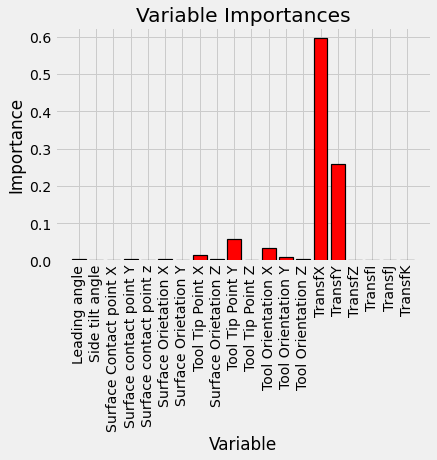

In [78]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

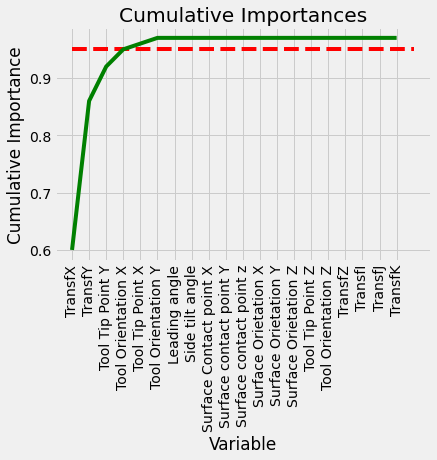

In [79]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [80]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 5


In [81]:
feature_list = list(feature_list)

In [82]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
X_train_important = X_train[:, important_indices]
X_test_important = X_test[:, important_indices]

# Sanity check on operations
print('Important train features shape:', X_train_important.shape)
print('Important test features shape:', X_test_important.shape)

Important train features shape: (1129021, 6)
Important test features shape: (556085, 6)


In [83]:
# Train the expanded model on only the important features
rf_exp.fit(X_train_important, y_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [84]:
# Import tools needed for visualization
"""
# Pull out one tree from the forest
tree = rf_exp.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'imp_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('imp_tree.dot')
# Write graph to a png file
graph.write_png('imp_tree.png')
"""

"\n# Pull out one tree from the forest\ntree = rf_exp.estimators_[5]\n# Export the image to a dot file\nexport_graphviz(tree, out_file = 'imp_tree.dot', feature_names = feature_list, rounded = True, precision = 1)\n# Use dot file to create a graph\n(graph, ) = pydot.graph_from_dot_file('imp_tree.dot')\n# Write graph to a png file\ngraph.write_png('imp_tree.png')\n"

In [85]:
# Make predictions on test data
predictions = rf_exp.predict(X_test_important)

# Performance metrics
errors = abs(predictions - y_test)
sq_error = errors**2

print('Metrics for Random Forest Trained on Full Features')
print('Average absolute error:', round(np.mean(errors), 2))
print('Root mean square error:', round(np.sqrt(np.mean(sq_error)), 2))


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Full Features
Average absolute error: 0.27
Root mean square error: 2.59
Accuracy: 48.71 %.


In [86]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['mse', 'mae']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 59, 108, 157, 206, 255, 304, 353, 402, 451, 500, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['mse', 'mae']}


In [53]:
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


exception calling callback for <Future at 0x7f1cffdc89d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/opt/conda/lib/

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.cv_results_